In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./Wine_red.csv",sep=';')
print(df.shape)
df.head(3)

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [3]:
features = df.drop('quality',axis=1)
features = pd.get_dummies(features)
features = (features - features.mean()) / features.std()

target = df.quality

In [4]:
features.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594



best alpha = {'alpha': 0.01}    test R2 0.31295614239329883


C:\Users\rileyma\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


volatile acidity       -0.183700
total sulfur dioxide   -0.083018
chlorides              -0.077757
pH                     -0.056476
fixed acidity           0.000000
citric acid            -0.000000
density                -0.000000
residual sugar          0.000350
free sulfur dioxide     0.020896
sulphates               0.136927
alcohol                 0.303336
dtype: float64

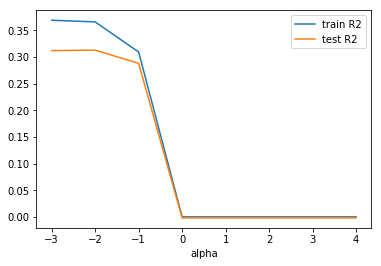

In [5]:
grid = {'alpha': [0.001,0.01,0.1,1,10,100,1000,10000]}
lasso = Lasso()
lassoCV = GridSearchCV(lasso,param_grid=grid, return_train_score=True)
lassoCV.fit(features,target)

print()
print('best alpha =' , lassoCV.best_params_ , '   test R2', lassoCV.best_score_)

performance = pd.DataFrame()
performance['alpha'] = np.log10(grid['alpha'])
performance['train R2'] = lassoCV.cv_results_['mean_train_score']
performance['test R2'] = lassoCV.cv_results_['mean_test_score']

ax1 = performance.plot.line(x='alpha',y='train R2')
performance.plot.line(x='alpha', y ='test R2', ax =ax1)

lasso = lassoCV.best_estimator_
coef = pd.Series(lasso.coef_,index=features.columns)
coef.sort_values()

## (A)

Volatile Acidity and Total Sulfur Dioxide have negative effects on wine quality.

## (B)

Alcohol and Sulphates have a positive effect on wine quality

## (C)

Fixed acidity, density, and citric acid all have no effect on wine quality